## Predicting Housing Prices 

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

import numpy as np
from sklearn import linear_model #from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


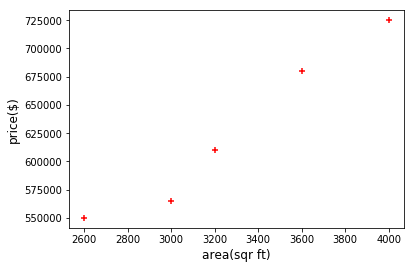

In [14]:
%matplotlib inline
plt.xlabel('area(sqr ft)', size='12')
plt.ylabel('price($)', size='12')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.show()

Once you look at this plot, you get an idea that the distribution is suitable for the linear regression model.

In [22]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
reg.predict([[3300]]) #model calculated the value for m(slope) and b(intercept) [slope are also called coefficient]

array([[628715.75342466]])

In [25]:
reg.coef_ #calculates the coefficient, or m(slope)

array([[135.78767123]])

In [26]:
reg.intercept_ #calculates the intercept, or b

array([180616.43835616])

In [30]:
reg.coef_*3300 + reg.intercept_  #That is the same as the reg.predict([[3300]]) calculated two steps above!

array([[628715.75342466]])

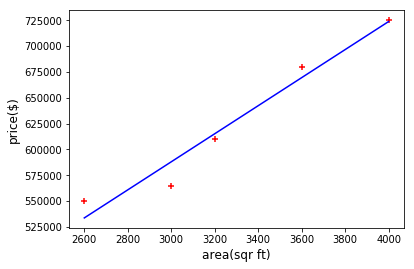

In [51]:
%matplotlib inline
plt.xlabel('area(sqr ft)', size='12')
plt.ylabel('price($)', size='12')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')
plt.show()

In [43]:
d = pd.read_csv('areas.csv')
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [44]:
p = reg.predict(d)

In [45]:
#Create a new column in your column
d['prices'] = p

In [46]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [48]:
d.to_csv('predict.csv', index=False) #index=False, erases the first column [0,1,...,12]

## Predicting Canada's Per Capita Income at 2020

In [69]:
df = pd.read_csv('canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


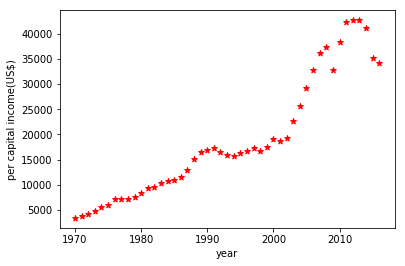

In [61]:
plt.xlabel('year')
plt.ylabel('per capital income(US$)')
plt.scatter(df.year, df.iloc[:,1], color='red', marker='*')
plt.show()

In [62]:
canadareg = linear_model.LinearRegression()

In [65]:
canadareg.fit(df[['year']], df.iloc[:,1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
canadareg.coef_

array([828.46507522])

In [67]:
canadareg.intercept_

-1632210.7578554575

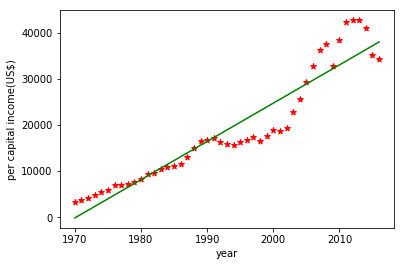

In [68]:
plt.xlabel('year')
plt.ylabel('per capital income(US$)')
plt.scatter(df.year, df.iloc[:,1], color='red', marker='*')
plt.plot(df.year, canadareg.predict(df[['year']]), color='green')
plt.show()

In [71]:
canadareg.predict([[2020]]) #find out the predicted per capita income in the year 2020

array([41288.69409442])

## Predicting Norway's  Population at 2020

In [60]:
from sklearn.linear_model import LinearRegression
import pandas as pd

popdf = pd.read_csv('population.csv', skiprows=3).drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', '2019', 'Unnamed: 64'])
popdf.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0
1,Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,...,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0
2,Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,...,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0


In [39]:
norway = popdf[popdf.iloc[:,0] == 'Norway']
norway['id'] = 175
norway.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,id
175,Norway,3581239.0,3609800.0,3638918.0,3666537.0,3694339.0,3723168.0,3753012.0,3784539.0,3816486.0,...,4889252.0,4953088.0,5018573.0,5079623.0,5137232.0,5188607.0,5234519.0,5276968.0,5311916.0,175


In [40]:
#import re 

#feature_models = [col for col in norway.columns if re.match("\d+",col) is not None]
#features = list(set([ re.sub("_[0-9]","",feature_model) for feature_model in feature_models]))
#pd.wide_to_long(norway, stubnames=features, i ="id" ,j= "year", suffix="\d+")

In [41]:
norway.columns = norway.columns.map(lambda x : 'Population_'+x if x !='Country Name' and x !='id' else x)
norway

,Country Name,Population_1960,Population_1961,Population_1962,Population_1963,Population_1964,Population_1965,Population_1966,Population_1967,Population_1968,...,Population_2010,Population_2011,Population_2012,Population_2013,Population_2014,Population_2015,Population_2016,Population_2017,Population_2018,id
175,Norway,3581239.0,3609800.0,3638918.0,3666537.0,3694339.0,3723168.0,3753012.0,3784539.0,3816486.0,...,4889252.0,4953088.0,5018573.0,5079623.0,5137232.0,5188607.0,5234519.0,5276968.0,5311916.0,175


In [96]:
norway_df = pd.wide_to_long(norway, stubnames="Population", i ="Country Name" ,j= "year", sep="_")
norway_df.index.levels #norway_df.index by itself will show the 0...45? index as well

FrozenList([['Norway'], [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]])

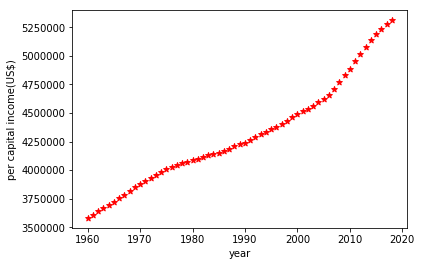

In [58]:
plt.xlabel('year')
plt.ylabel('per capital income(US$)')
plt.scatter(norway_df.index.levels[1], norway_df.Population, color='red', marker='*')
plt.show()

In [61]:
norwayreg = linear_model.LinearRegression()

In [108]:
import numpy as np

convert_to_2darray = []
for i in range(len(norway_df.index.values)):
    convert_to_2darray.append(list(norway_df.index.values[i]).pop(1))

twodarray = np.array(convert_to_2darray).reshape(-1,1)
twodarray

array([[1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018]])

In [109]:
norwayreg.fit(twodarray, norway_df.Population)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
norwayreg.coef_

array([26205.7295149])

In [111]:
norwayreg.intercept_

-47812182.0051432

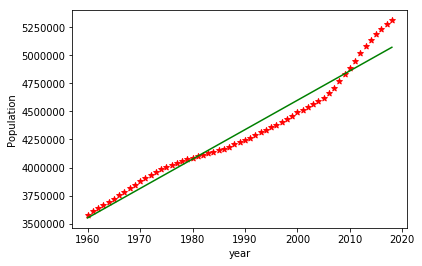

In [113]:
plt.xlabel('year')
plt.ylabel('Population')
plt.scatter(norway_df.index.levels[1], norway_df.Population, color='red', marker='*')
plt.plot(norway_df.index.levels[1], norwayreg.predict(twodarray), color='green')
plt.show()

In [115]:
norwayreg.predict([[2019]])

array([5097185.88544711])

In [116]:
norwayreg.predict([[2020]])

array([5123391.61496201])